In [2]:
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats
df = pd.read_csv("/Users/jieyichen/Desktop/2178data.csv")

In [3]:
df_strip = df[df["StripSearch"] == 1]
r, c = df_strip.shape
print(r, c)

7801 25


In [4]:
df = df[df.Sex != "U"]

# Exploratory Data Analysis (EDA)

## Variable: Perceived Race

### Frequency Table

In [5]:
print(df["Perceived_Race"].value_counts())

White                   27718
Black                   17526
Unknown or Legacy        5053
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1767
Name: Perceived_Race, dtype: int64


### Bar Plot

<AxesSubplot:title={'center':'Perceived Race'}, xlabel='Race', ylabel='Number of Arrests'>

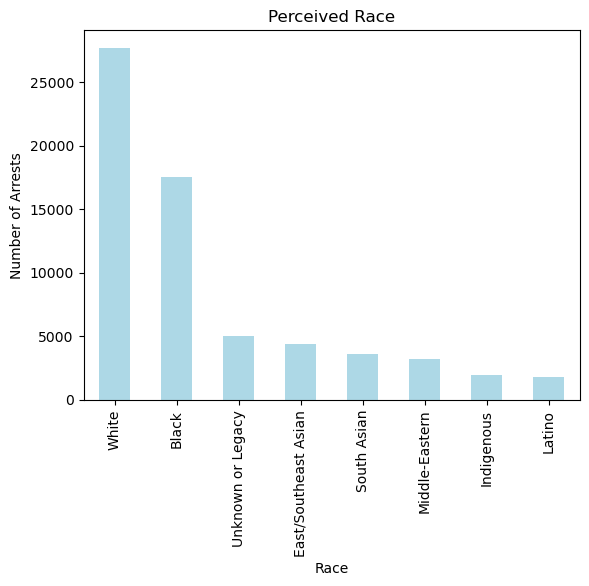

In [6]:
df["Perceived_Race"].value_counts().plot(kind = "bar", 
                                         title = "Perceived Race",
                                         xlabel = "Race", 
                                         ylabel = "Number of Arrests",
                                         color = "lightblue")

## Variable: Sex

### Frequency Table

In [7]:
print(df["Sex"].value_counts())

M    52650
F    12617
Name: Sex, dtype: int64


### Bar Plot

<AxesSubplot:title={'center':'Sex'}, xlabel='Sex', ylabel='Number of Arrests'>

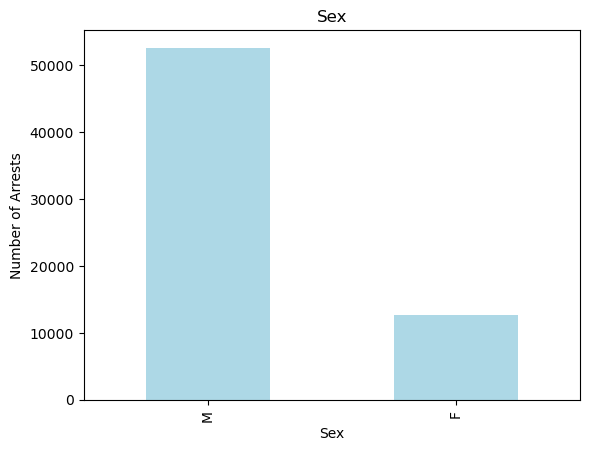

In [8]:
df["Sex"].value_counts().plot(kind = "bar", 
                              title = "Sex",
                              xlabel = "Sex", 
                              ylabel = "Number of Arrests",
                              color = "lightblue")

## Variable: Age Group

### Frequency Table

In [9]:
print(df["Age_group__at_arrest_"].value_counts())

Aged 25 to 34 years          20945
Aged 35 to 44 years          16241
Aged 18 to 24 years          10039
Aged 45 to 54 years           9066
Aged 55 to 64 years           4588
Aged 17 years and younger     1681
Aged 17 years and under       1361
Aged 65 years and older        698
Aged 65 and older              624
Name: Age_group__at_arrest_, dtype: int64


### Bar Plot

<AxesSubplot:title={'center':'Age Group at Arrest'}, xlabel='Age Group', ylabel='Number of Arrests'>

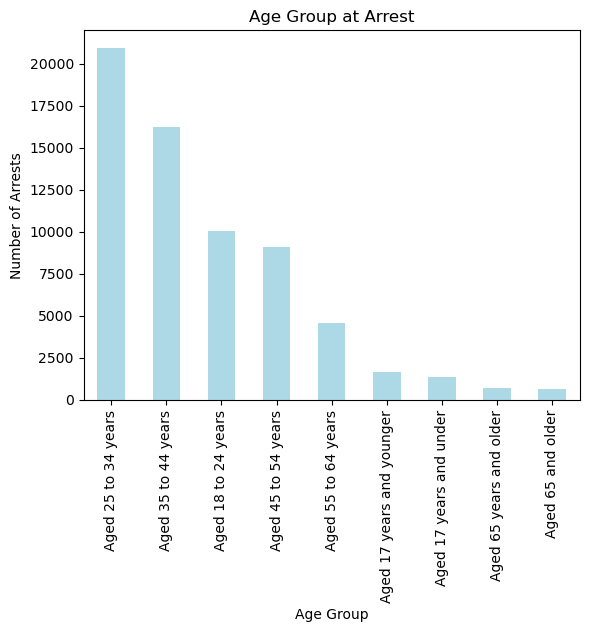

In [10]:
df["Age_group__at_arrest_"].value_counts().plot(kind = "bar",
                                                title = "Age Group at Arrest",
                                                xlabel = "Age Group", 
                                                ylabel = "Number of Arrests",
                                                color = "lightblue")

## Variable: Actions at Arrest

### Bar Plot

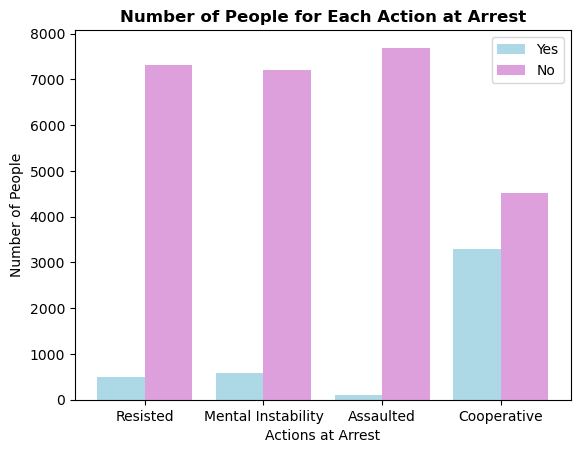

In [11]:
act_cols = ["Resisted", "Mental Instability", "Assaulted", "Cooperative"]
yes = [sum(df_strip["Actions_at_arrest___Resisted__d"]), sum(df_strip["Actions_at_arrest___Mental_inst"]),
      sum(df_strip["Actions_at_arrest___Assaulted_o"]), sum(df_strip["Actions_at_arrest___Cooperative"])]
no = [(r - n) for n in yes]
x = np.arange(len(act_cols))
plt.bar(x - 0.2, yes, 0.4, label = "Yes", color = "lightblue")
plt.bar(x + 0.2, no, 0.4, label = "No", color = "plum")
plt.xticks(x, act_cols)
plt.xlabel("Actions at Arrest")
plt.ylabel("Number of People")
plt.title("Number of People for Each Action at Arrest", fontweight = "bold")
plt.legend()
plt.show()

## Variable: Search Reason

### Bar Plot

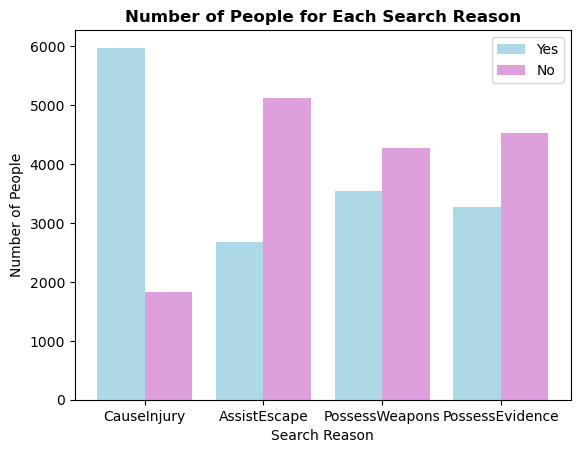

In [12]:
search_cols = ["CauseInjury", "AssistEscape",
              "PossessWeapons", "PossessEvidence"]
yes = [sum(df_strip["SearchReason_CauseInjury"]), sum(df_strip["SearchReason_AssistEscape"]),
      sum(df_strip["SearchReason_PossessWeapons"]), sum(df_strip["SearchReason_PossessEvidence"])]
no = [(r - n) for n in yes]
x = np.arange(len(search_cols))
plt.bar(x - 0.2, yes, 0.4, label = "Yes", color = "lightblue")
plt.bar(x + 0.2, no, 0.4, label = "No", color = "plum")
plt.xticks(x, search_cols)
plt.xlabel("Search Reason")
plt.ylabel("Number of People")
plt.title("Number of People for Each Search Reason", fontweight = "bold")
plt.legend()
plt.show()

# RQ1

## Variable: Sex

### Cross-Table

In [13]:
tab = pd.crosstab(df["StripSearch"], 
                  df["Sex"],
                  margins = True)
tab

Sex,F,M,All
StripSearch,,,
0,11334,46132,57466
1,1283,6518,7801
All,12617,52650,65267


### F-Test

$H_0$: The variance of strip search between male and female are equal (i.e., $var_{male}=var_{female}$) \
$H_A$: The variance of strip search between male and female are not equal (i.e., $var_{male}\ne var_{female}$)

In [14]:
group1 = df["StripSearch"][df["Sex"] == "M"]
group2 = df["StripSearch"][df["Sex"] == "F"]
group1 = np.array(group1)
group2 = np.array(group2)
f = np.var(group1, ddof = 1) / np.var(group2, ddof = 1)
nun = group1.size - 1
dun = group2.size - 1
p = 1 - scipy.stats.f.cdf(f, nun, dun)
p

1.1102230246251565e-16

Since the p-value is less than the significance level $\alpha=0.05$, there is evidence to reject the null hypothesis. There is a difference for variance of strip search between male and female, therefore we apply t-test with unequal variance.

In [15]:
df.groupby("Sex")["StripSearch"].var()

Sex
F    0.091355
M    0.108475
Name: StripSearch, dtype: float64

In [16]:
mean_sex = df.groupby("Sex")["StripSearch"].mean()
sd_sex = df.groupby("Sex")["StripSearch"].std()
print(mean_sex)
print(sd_sex)

Sex
F    0.101688
M    0.123799
Name: StripSearch, dtype: float64
Sex
F    0.302250
M    0.329355
Name: StripSearch, dtype: float64


### T-Test with Unequal Variance

$H_0$: Whether or not the person gets strip searched is not associated with their sex (i.e., $\mu_{male}=\mu_{female}$) \
$H_A$: Whether or not the person gets strip searched is associated with their sex (i.e., $\mu_{male}\ne\mu_{female}$)

In [17]:
ttest_ind(df["StripSearch"][df["Sex"] == "M"],
         df["StripSearch"][df["Sex"] == "F"],
         equal_var = False)

Ttest_indResult(statistic=7.24995064850636, pvalue=4.317911044176087e-13)

The p-value is 4.318e-13 which is smaller than 0.05, therefore we have strong evidence to reject the null hypothesis and indicate that there is a difference between males and females of the population mean of individuals who undergo strip searches.

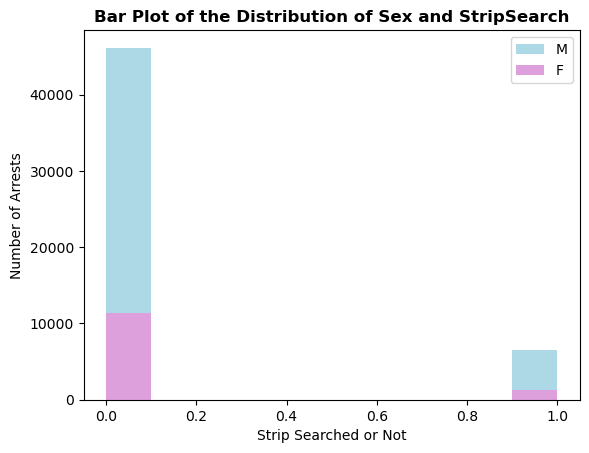

In [18]:
figure = plt.figure()
plt.hist(df['StripSearch'][df['Sex'] == 'M'], label = 'M', color = "lightblue")
plt.hist(df['StripSearch'][df['Sex'] == 'F'], label = 'F', color = "plum")
plt.ylabel("Number of Arrests")
plt.xlabel("Strip Searched or Not")
plt.title("Bar Plot of the Distribution of Sex and StripSearch", fontweight = "bold")
plt.legend()
plt.show()

From the plot we could see that whether the individuals of being strip searched or not, the number of males are higher than the number of females. The number of individuals are not being strip searched is higher than the number of individuals are being strip searched.

## Variable: Age

In [19]:
df.Age_group__at_arrest_.value_counts()

Aged 25 to 34 years          20945
Aged 35 to 44 years          16241
Aged 18 to 24 years          10039
Aged 45 to 54 years           9066
Aged 55 to 64 years           4588
Aged 17 years and younger     1681
Aged 17 years and under       1361
Aged 65 years and older        698
Aged 65 and older              624
Name: Age_group__at_arrest_, dtype: int64

In order to analyze the correlation between age and strip searches by using T-Test and ANOVA , we categorized the 9 groups of different age into two-level explanatory variable. The group of people's age under 34 years old treated as being strip searched and the group of people's age above 34 years old treated as not being strip searched. Therefore, we conducted the age map to do the further analysis.

In [20]:
age_map = {"Aged 17 years and younger": 1,
          "Aged 17 years and under": 1,
          "Aged 18 to 24 years": 1,
          "Aged 25 to 34 years": 1,
          "Aged 45 to 54 years": 0,
          "Aged 55 to 64 years": 0,
          "Aged 65 years and older": 0,
          "Aged 65 and older": 0}
df["age_arrest_below34"] = df["Age_group__at_arrest_"].map(age_map)

In [21]:
df.groupby(["age_arrest_below34"])["StripSearch"].var()

age_arrest_below34
0.0    0.079441
1.0    0.112594
Name: StripSearch, dtype: float64

In [22]:
df.groupby(["age_arrest_below34"])["StripSearch"].mean()

age_arrest_below34
0.0    0.087006
1.0    0.129313
Name: StripSearch, dtype: float64

In [23]:
df.groupby(["age_arrest_below34"])["StripSearch"].std()

age_arrest_below34
0.0    0.281853
1.0    0.335551
Name: StripSearch, dtype: float64

### Cross-Table

In [24]:
tab = pd.crosstab(df["StripSearch"], 
                  df["age_arrest_below34"],
                  margins = True)
tab

age_arrest_below34,0.0,1.0,All
StripSearch,,,
0,13673,29626,43299
1,1303,4400,5703
All,14976,34026,49002


### F-Test

$H_0$: The variance of strip search between people under the age of 34 and over the age of 34 are equal (i.e., $var_{under34}=var_{over34}$) \
$H_A$: The variance of strip search between people under the age of 34 and over the age of 34 are not equal (i.e., $var_{under34}\ne var_{over34}$)

In [25]:
group1 = df["StripSearch"][df["age_arrest_below34"] == 1]
group2 = df["StripSearch"][df["age_arrest_below34"] == 0]
group1 = np.array(group1)
group2 = np.array(group2)
f = np.var(group1, ddof = 1) / np.var(group2, ddof = 1)
nun = group1.size - 1
dun = group2.size - 1
p = 1 - scipy.stats.f.cdf(f, nun, dun)
p

1.1102230246251565e-16

Since the p-value is less than the significance level $\alpha=0.05$, there is evidence to reject the null hypothesis. There is a difference for variance of strip search between people with ages below 34 and over 34, therefore we apply t-test with unequal variance.

### T-Test with Unequal Variance

$H_0$: Whether or not the person gets strip searched is not associated with whether they are under the age of 34 or over the age of 34 (i.e., $\mu_{under34}=\mu_{over34}$) \
$H_A$: Whether or not the person gets strip searched is associated with whether they are under the age of 34 or over the age of 34 (i.e., $\mu_{under34}\ne\mu_{over34}$)

In [26]:
ttest_ind(df["StripSearch"][df["age_arrest_below34"] == 1],
         df["StripSearch"][df["age_arrest_below34"] == 0],
         equal_var = False)

Ttest_indResult(statistic=14.415146830255951, pvalue=5.733968551344111e-47)

The p-value is 5.73e-47 which is smaller than 0.05, therefore we have strong evidence to reject the null hypothesis and indicate that there is a difference between the age of arrested under 34 years and above 34 years of the population mean of individuals who undergo strip searches.

## Two-way ANOVA

$H1_0$: *There is no significant difference in the mean number of strip searches performed between males and females* \
$H1_A$: *There is significant difference in the mean number of strip searches performed between males and females\
$H2_0$: There is no significant difference in the mean number of strip searches performed between different age groups* \
$H2_A$: *There is significant difference in the mean number of strip searches performed between different age groups\
$H3_0$: There is no two way interaction among the two explanatory variables \
$H3_A$: *There is two way interaction among the two explanatory variables*

In [27]:
import statsmodels.api as sm
# Associated Variables: Sex and Age group
model_1 = ols("StripSearch ~ C(Sex) + C(age_arrest_below34) + C(Sex):C(age_arrest_below34)",
           data = df).fit()
sm.stats.anova_lm(model_1, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),4.629689,1.0,45.224266,1.776375e-11
C(age_arrest_below34),19.452216,1.0,190.015397,3.798468e-43
C(Sex):C(age_arrest_below34),0.012004,1.0,0.117259,7.320277e-01
Residual,5016.012985,48998.0,NaN,NaN


Null Hypothesis 1:

Since the p-value is 1.776e-11 which is smaller than 0.05, therefore we have strong evidence to reject the null 
hypothesis and indicate that there is a significant difference in the mean number of strip searches performed between 
males and females.

Null Hypothesis 2:

Since the p-value is 3.798e-43 which is smaller than 0.05, therefore we have strong evidence to reject the null 
hypothesis and indicate that there is a significant difference in the mean number of strip searches performed between 
different age groups.

Null Hypothesis 3:

Since the p-value is 0.732 which is greater than 0.05, therefore we are fail to reject the null hypothesis and indicate 
that there is no two way intercation among the two explanatory variables.

## Post-hoc Tests

In [28]:
# perform post-hoc tests using Tukey HSD test
mc1 = MultiComparison(df['StripSearch'], df['Sex'])
result1 = mc1.tukeyhsd()
mc2 = MultiComparison(df['StripSearch'],df['age_arrest_below34'])
result2 = mc2.tukeyhsd()
print(result1.summary())
print(result2.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     F      M   0.0221  -0.0 0.0158 0.0284   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0   0.0423    0.0  0.0349 0.0498   True
   0.0    nan    0.042    0.0  0.0334 0.0506   True
   1.0    nan  -0.0003 0.9939 -0.0076 0.0069  False
---------------------------------------------------


In [29]:
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].fillna('Unknown')

In [30]:
age_group_map = {"Aged 17 years and younger": '0-17',
          "Aged 17 years and under": '0-17',
          "Aged 18 to 24 years": '18-24',
          "Aged 25 to 34 years": '25-34',
          "Aged 45 to 54 years": '45-54',
          "Aged 55 to 64 years": '55-64',
          "Aged 65 years and older": '>65',
          "Aged 65 and older": '>65',
                "Unknow":'Unknow'}
df["Age_group__at_arrest_"] = df["Age_group__at_arrest_"].map(age_group_map)

## Interaction Plot

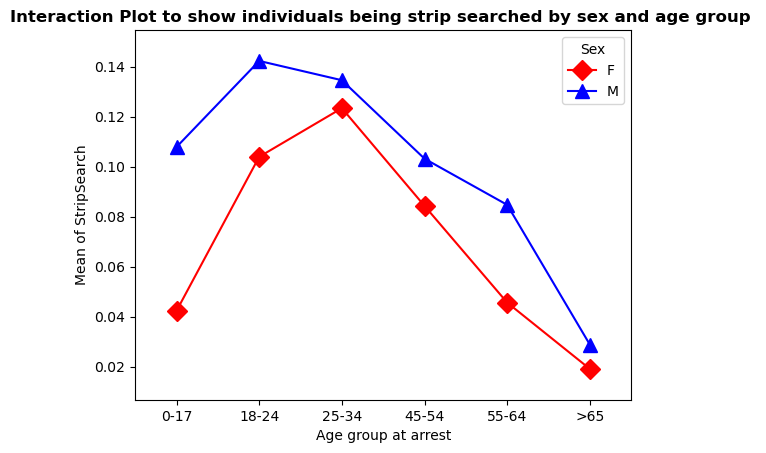

In [31]:
#plot an interaction plot 
#refer to: https://www.statsmodels.org/dev/generated/statsmodels.graphics.factorplots.interaction_plot.html
from statsmodels.graphics.factorplots import interaction_plot
rq_1_interaction = interaction_plot(df['Age_group__at_arrest_'], df['Sex'], df['StripSearch'], 
                                    colors=['red','blue'],markers=['D','^'], ms=10)

plt.ylabel('Mean of StripSearch')
plt.xlabel('Age group at arrest')
plt.title('Interaction Plot to show individuals being strip searched by sex and age group ', fontweight='bold')
plt.show()

# RQ2

## Variable: Actions_at_arrest___Resisted__d

### Cross-Table

In [32]:
tab = pd.crosstab(df_strip["ItemsFound"], 
                  df_strip["Actions_at_arrest___Resisted__d"],
                  margins = True)
tab

Actions_at_arrest___Resisted__d,0,1,All
ItemsFound,,,
0.0,4578,312,4890
1.0,2731,180,2911
All,7309,492,7801


### F-Test

$H_0$: The variance of items found in strip search between people who resisted arrest and people who did not resist arrest are equal (i.e., $var_{resisted}=var_{no\space resist}$) \
$H_A$: The variance of items found in strip search between people who resisted arrest and people who did not resist arrest are not equal (i.e., $var_{resisted}\ne var_{no\space resist}$)

In [33]:
group1 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Resisted__d"] == 1]
group2 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Resisted__d"] == 0]
group1 = np.array(group1)
group2 = np.array(group2)
f = np.var(group1, ddof = 1) / np.var(group2, ddof = 1)
nun = group1.size - 1
dun = group2.size - 1
p = 1 - scipy.stats.f.cdf(f, nun, dun)
p

0.5334957411923809

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. There is no difference for variance of items found between individuals who resisted arrest and individuals who did not resist arrest, therefore we apply t-test with equal variance.

### T-Test with Equal Variance

$H_0$: The items found in strip search is not associated with whether or not the person resisted arrest (i.e., $\mu_{resisted}=\mu_{no\space resist}$) \
$H_A$: The items found in strip search is associated with whether or not the person resisted arrest (i.e., $\mu_{resisted}\ne\mu_{no\space resist}$)

In [34]:
import scipy.stats as st
st.ttest_ind(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Resisted__d"] == 1],
            df_strip["ItemsFound"][df_strip["Actions_at_arrest___Resisted__d"] == 0],
            equal_var = True)

Ttest_indResult(statistic=-0.34601092659114285, pvalue=0.7293438364617335)

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. Thus there is no association between the items found in strip search and whether or not the person resisted arrest.

### Plot

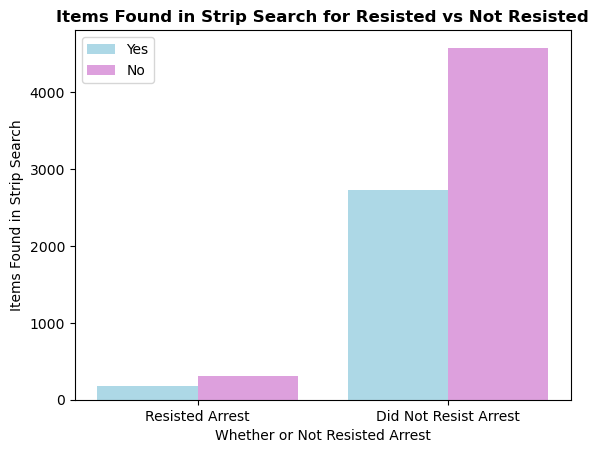

In [35]:
cols = ["Resisted Arrest", "Did Not Resist Arrest"]
yes = [sum(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Resisted__d"] == 1]),
      sum(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Resisted__d"] == 0])]
r_1 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Resisted__d"] == 1].shape[0]
r_2 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Resisted__d"] == 0].shape[0]
no = [r_1 - yes[0], r_2 - yes[1]]
x = np.arange(len(cols))
plt.bar(x - 0.2, yes, 0.4, label = "Yes", color = "lightblue")
plt.bar(x + 0.2, no, 0.4, label = "No", color = "plum")
plt.xticks(x, cols)
plt.xlabel("Whether or Not Resisted Arrest")
plt.ylabel("Items Found in Strip Search")
plt.title("Items Found in Strip Search for Resisted vs Not Resisted",
         fontweight = "bold")
plt.legend()
plt.show()

In [36]:
tab = pd.crosstab(df_strip.ItemsFound, df_strip.Actions_at_arrest___Resisted__d)
tab[1][0] / (tab[1][0] + tab[0][0]), tab[1][1] / (tab[1][1] + tab[0][1])

(0.0638036809815951, 0.06183442116111302)

From the bar plot and the cross-table, we can see that the percentage of items found = 0 and items found = 1 is very similar between the ones that resisted arrest and the ones that did not resist arrest. This is consistent with the result of the t-test that there is no association between whether or not the person resisted arrest and the items found in strip search.

## Variable: Actions_at_arrest___Mental_inst

### Cross-Table

In [37]:
tab = pd.crosstab(df_strip["ItemsFound"], 
                  df_strip["Actions_at_arrest___Mental_inst"],
                  margins = True)
tab

Actions_at_arrest___Mental_inst,0,1,All
ItemsFound,,,
0.0,4548,342,4890
1.0,2660,251,2911
All,7208,593,7801


### F-Test

$H_0$: The variance of items found in strip search between people who showed mental instability at arrest and people who did not show mental instability at arrest are equal (i.e., $var_{mental}=var_{not\space mental}$) \
$H_A$: The variance of items found in strip search between people who showed mental instability at arrest and people who did not show mental instability at arrest are not equal (i.e., $var_{mental}\ne var_{not\space mental}$)

In [38]:
group1 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Mental_inst"] == 1]
group2 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Mental_inst"] == 0]
group1 = np.array(group1)
group2 = np.array(group2)
f = np.var(group1, ddof = 1) / np.var(group2, ddof = 1)
nun = group1.size - 1
dun = group2.size - 1
p = 1 - scipy.stats.f.cdf(f, nun, dun)
p

0.20339399036586514

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. There is no difference for variance of items found between people who showed mental instability at arrest and people who did not show mental instability at arrest, therefore we apply t-test with equal variance.

### T-Test with Equal Variance

$H_0$: The items found in strip search is not associated with whether or not the person showed mental instability at arrest (i.e., $\mu_{mental}=\mu_{not\space mental}$) \
$H_A$: The items found in strip search is associated with whether or not the person showed mental instability at arrest (i.e., $\mu_{mental}\ne\mu_{not\space mental}$)

In [39]:
st.ttest_ind(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Mental_inst"] == 1],
            df_strip["ItemsFound"][df_strip["Actions_at_arrest___Mental_inst"] == 0],
            equal_var = True)

Ttest_indResult(statistic=2.625832220107603, pvalue=0.008660622703063203)

Since the p-value is less than the significance level $\alpha=0.05$, there is evidence to reject the null hypothesis. Thus there is an association between the items found in strip search and whether or not the person was mentally instable at arrest.

### Plot

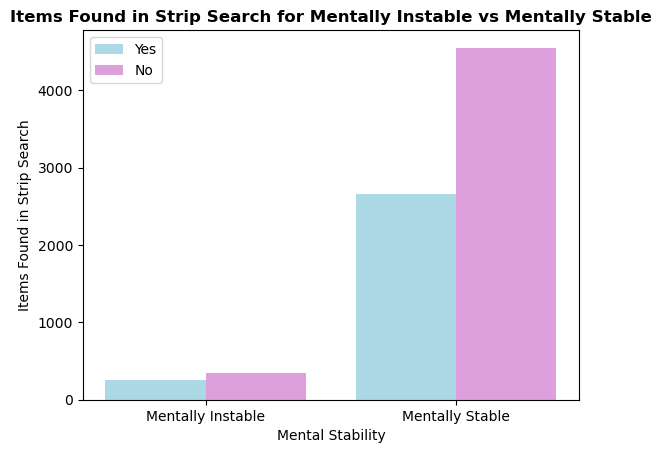

In [40]:
cols = ["Mentally Instable", "Mentally Stable"]
yes = [sum(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Mental_inst"] == 1]),
      sum(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Mental_inst"] == 0])]
r_1 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Mental_inst"] == 1].shape[0]
r_2 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Mental_inst"] == 0].shape[0]
no = [r_1 - yes[0], r_2 - yes[1]]
x = np.arange(len(cols))
plt.bar(x - 0.2, yes, 0.4, label = "Yes", color = "lightblue")
plt.bar(x + 0.2, no, 0.4, label = "No", color = "plum")
plt.xticks(x, cols)
plt.xlabel("Mental Stability")
plt.ylabel("Items Found in Strip Search")
plt.title("Items Found in Strip Search for Mentally Instable vs Mentally Stable",
         fontweight = "bold")
plt.legend()
plt.show()

In [41]:
tab = pd.crosstab(df_strip.ItemsFound, df_strip.Actions_at_arrest___Mental_inst)
tab[1][0] / (tab[1][0] + tab[0][0]), tab[1][1] / (tab[1][1] + tab[0][1])

(0.06993865030674846, 0.08622466506355204)

From the bar plot and the cross-table, we can see that the percentage of items found = 0 and items found = 1 differ quite a bit between the ones that showed mental instability at arrest and the ones that did not show mental instability at arrest. This is consistent with the result of the t-test that there is an association between whether or not the person showed mental instability at arrest and the items found in strip search. The statistics show that it is more likely to find items in a strip search when the person shows mental instability at arrest.

## Variable: Actions_at_arrest___Assaulted_o

### Cross-Table

In [42]:
tab = pd.crosstab(df_strip["ItemsFound"], 
                  df_strip["Actions_at_arrest___Assaulted_o"],
                  margins = True)
tab

Actions_at_arrest___Assaulted_o,0,1,All
ItemsFound,,,
0.0,4823,67,4890
1.0,2867,44,2911
All,7690,111,7801


### F-Test

$H_0$: The variance of items found in strip search between people who assaulted others at arrest and people who did not assault others at arrest are equal (i.e., $var_{assault}=var_{no\space assault}$) \
$H_A$: The variance of items found in strip search between people who assaulted others at arrest and people who did not assault others at arrest are not equal (i.e., $var_{assault}\ne var_{no\space assault}$)

In [43]:
group1 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Assaulted_o"] == 1]
group2 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Assaulted_o"] == 0]
group1 = np.array(group1)
group2 = np.array(group2)
f = np.var(group1, ddof = 1) / np.var(group2, ddof = 1)
nun = group1.size - 1
dun = group2.size - 1
p = 1 - scipy.stats.f.cdf(f, nun, dun)
p

0.3896780711640617

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. There is no difference for variance of items found between people who assaulted others at arrest and people who did not assault others at arrest, therefore we apply t-test with equal variance.

### T-Test with Equal Variance

$H_0$: The items found in strip search is not associated with whether or not the person assaulted others at arrest (i.e., $\mu_{assault}=\mu_{no\space assault}$) \
$H_A$: The items found in strip search is associated with whether or not the person assaulted others at arrest (i.e., $\mu_{assault}\ne\mu_{no\space assault}$)

In [44]:
st.ttest_ind(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Assaulted_o"] == 1],
            df_strip["ItemsFound"][df_strip["Actions_at_arrest___Assaulted_o"] == 0],
            equal_var = True)

Ttest_indResult(statistic=0.5098227750632499, pvalue=0.6101900545743943)

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. Thus there is no association between the items found in strip search and whether or not the person assaulted others at arrest

### Plot

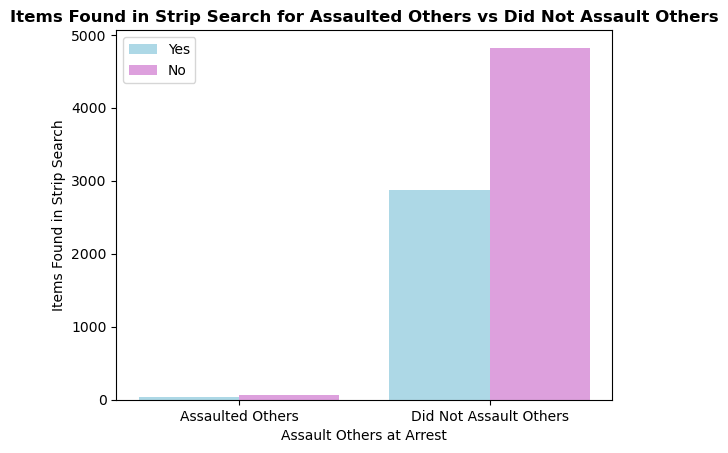

In [45]:
cols = ["Assaulted Others", "Did Not Assault Others"]
yes = [sum(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Assaulted_o"] == 1]),
      sum(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Assaulted_o"] == 0])]
r_1 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Assaulted_o"] == 1].shape[0]
r_2 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Assaulted_o"] == 0].shape[0]
no = [r_1 - yes[0], r_2 - yes[1]]
x = np.arange(len(cols))
plt.bar(x - 0.2, yes, 0.4, label = "Yes", color = "lightblue")
plt.bar(x + 0.2, no, 0.4, label = "No", color = "plum")
plt.xticks(x, cols)
plt.xlabel("Assault Others at Arrest")
plt.ylabel("Items Found in Strip Search")
plt.title("Items Found in Strip Search for Assaulted Others vs Did Not Assault Others",
         fontweight = "bold")
plt.legend()
plt.show()

In [46]:
tab = pd.crosstab(df_strip.ItemsFound, df_strip.Actions_at_arrest___Assaulted_o)
tab[1][0] / (tab[1][0] + tab[0][0]), tab[1][1] / (tab[1][1] + tab[0][1])

(0.013701431492842536, 0.01511508072827207)

From the bar plot and the cross-table, we can see that the percentage of items found = 0 and items found = 1 is very similar between the ones that assaulted others at arrest and the ones that did not assault others at arrest. This is consistent with the result of the t-test that there is no association between whether or not the person assaulted others at arrest and the items found in strip search.

## Variable: Actions_at_arrest___Cooperative

### Cross-Table

In [47]:
tab = pd.crosstab(df_strip["ItemsFound"], 
                  df_strip["Actions_at_arrest___Cooperative"],
                  margins = True)
tab
(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Cooperative"] == 0]).mean()

0.3611418455410489

### F-Test

$H_0$: The variance of items found in strip search between people who were cooperative at arrest and people who were not cooperative at arrest are equal (i.e., $var_{cooperative}=var_{not\space cooperative}$) \
$H_A$: The variance of items found in strip search between people who were cooperative at arrest and people who were not cooperative at arrest are not equal (i.e., $var_{cooperative}\ne var_{not\space cooperative}$)

In [48]:
group1 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Cooperative"] == 1]
group2 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Cooperative"] == 0]
group1 = np.array(group1)
group2 = np.array(group2)
f = np.var(group1, ddof = 1) / np.var(group2, ddof = 1)
nun = group1.size - 1
dun = group2.size - 1
p = 1 - scipy.stats.f.cdf(f, nun, dun)
p

0.17325370746845192

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. There is no difference for variance of items found between people who were cooperative at arrest and people who were not cooperative at arrest, therefore we apply t-test with equal variance.

### T-Test with Equal Variance

$H_0$: The items found in strip search is not associated with whether or not the person was cooperative at arrest (i.e., $\mu_{cooperative}=\mu_{not\space cooperative}$) \
$H_A$: The items found in strip search is associated with whether or not the person was cooperative at arrest (i.e., $\mu_{cooperative}\ne\mu_{not\space cooperative}$)

In [49]:
st.ttest_ind(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Cooperative"] == 1],
            df_strip["ItemsFound"][df_strip["Actions_at_arrest___Cooperative"] == 0],
            equal_var = True)

Ttest_indResult(statistic=2.575552790752676, pvalue=0.010026244925298479)

Since the p-value is smaller than the significancce level $\alpha=0.05$, there is evidence to reject the null hypothesis. Thus there is an association between the items found in strip search and whether or not the person was cooperative at arrest.

### Plot

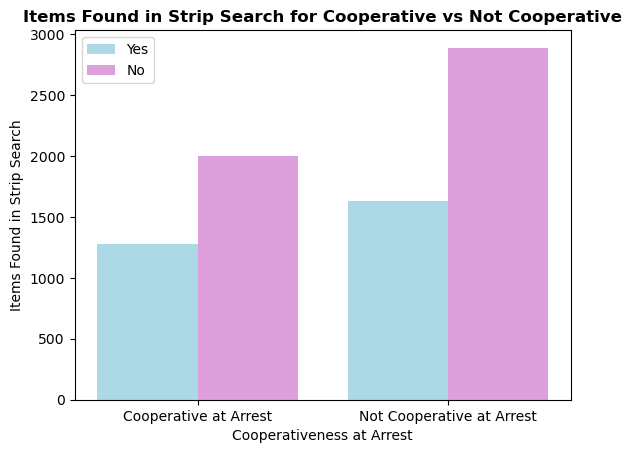

In [50]:
cols = ["Cooperative at Arrest", "Not Cooperative at Arrest"]
yes = [sum(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Cooperative"] == 1]),
      sum(df_strip["ItemsFound"][df_strip["Actions_at_arrest___Cooperative"] == 0])]
r_1 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Cooperative"] == 1].shape[0]
r_2 = df_strip["ItemsFound"][df_strip["Actions_at_arrest___Cooperative"] == 0].shape[0]
no = [r_1 - yes[0], r_2 - yes[1]]
x = np.arange(len(cols))
plt.bar(x - 0.2, yes, 0.4, label = "Yes", color = "lightblue")
plt.bar(x + 0.2, no, 0.4, label = "No", color = "plum")
plt.xticks(x, cols)
plt.xlabel("Cooperativeness at Arrest")
plt.ylabel("Items Found in Strip Search")
plt.title("Items Found in Strip Search for Cooperative vs Not Cooperative",
         fontweight = "bold")
plt.legend()
plt.show()

In [51]:
tab = pd.crosstab(df_strip.ItemsFound, df_strip.Actions_at_arrest___Cooperative)
tab[1][0] / (tab[1][0] + tab[0][0]), tab[1][1] / (tab[1][1] + tab[0][1])

(0.4096114519427403, 0.43936791480590864)

From the bar plot and the cross-table, we can see that the percentage of items found = 0 and items found = 1 differs between the ones that were cooperative at arrest and the ones that were not cooperative at arrest. This is consistent with the result of the t-test that there is an association between whether or not the person was cooperative at arrest and the items found in strip search. The statistics show that it is more likely to find items in a strip search when the person is cooperative at arrest.

## Variable: SearchReason_CauseInjury

### Cross-Table

In [52]:
tab = pd.crosstab(df_strip["ItemsFound"], 
                  df_strip["SearchReason_CauseInjury"],
                  margins = True)
tab
(df_strip["ItemsFound"][df_strip["SearchReason_CauseInjury"] == 1]).std()

0.4845980031805604

### F-Test

$H_0$: The variance of items found in strip search between people whose search reason was causing injuries and people whose search reason was not causing injuries are equal (i.e., $var_{injury}=var_{no\space injury}$) \
$H_A$: The variance of items found in strip search between people whose search reason was causing injuries and people whose search reason was not causing injuries are not equal (i.e., $var_{injury}\ne var_{no\space injury}$)

In [53]:
group1 = df_strip["ItemsFound"][df_strip["SearchReason_CauseInjury"] == 1]
group2 = df_strip["ItemsFound"][df_strip["SearchReason_CauseInjury"] == 0]
group1 = np.array(group1)
group2 = np.array(group2)
f = np.var(group1, ddof = 1) / np.var(group2, ddof = 1)
nun = group1.size - 1
dun = group2.size - 1
p = 1 - scipy.stats.f.cdf(f, nun, dun)
p

0.3330740529436975

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. There is no difference for variance of items found between people whose search reason was causing injuries and people whose search reason was not causing injuries, therefore we apply t-test with equal variance.

### T-Test with Equal Variance

$H_0$: The items found in strip search is not associated with whether or not the person was searched for causing injuries (i.e., $\mu_{injury}=\mu_{no\space injury}$) \
$H_A$: The items found in strip search is associated with whether or not the person was searched for causing injuries (i.e., $\mu_{injury}\ne\mu_{no\space injury}$)

In [54]:
st.ttest_ind(df_strip["ItemsFound"][df_strip["SearchReason_CauseInjury"] == 1],
            df_strip["ItemsFound"][df_strip["SearchReason_CauseInjury"] == 0],
            equal_var = True)

Ttest_indResult(statistic=1.1678272161767251, pvalue=0.24291216767109386)

Since the p-value is greater than 0.05, there is no evidence to reject the null hypothesis. Thus there is no association between the items found in strip search and whether or not the person was searched for causing injury.

### Plot

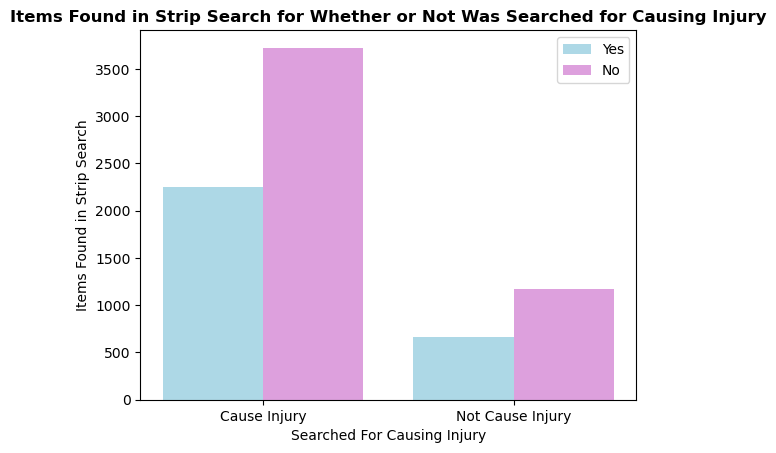

In [55]:
cols = ["Cause Injury", "Not Cause Injury"]
yes = [sum(df_strip["ItemsFound"][df_strip["SearchReason_CauseInjury"] == 1]),
      sum(df_strip["ItemsFound"][df_strip["SearchReason_CauseInjury"] == 0])]
r_1 = df_strip["ItemsFound"][df_strip["SearchReason_CauseInjury"] == 1].shape[0]
r_2 = df_strip["ItemsFound"][df_strip["SearchReason_CauseInjury"] == 0].shape[0]
no = [r_1 - yes[0], r_2 - yes[1]]
x = np.arange(len(cols))
plt.bar(x - 0.2, yes, 0.4, label = "Yes", color = "lightblue")
plt.bar(x + 0.2, no, 0.4, label = "No", color = "plum")
plt.xticks(x, cols)
plt.xlabel("Searched For Causing Injury")
plt.ylabel("Items Found in Strip Search")
plt.title("Items Found in Strip Search for Whether or Not Was Searched for Causing Injury",
         fontweight = "bold")
plt.legend()
plt.show()

In [56]:
tab = pd.crosstab(df_strip.ItemsFound, df_strip.SearchReason_CauseInjury)
tab[1][0] / (tab[1][0] + tab[0][0]), tab[1][1] / (tab[1][1] + tab[0][1])

(0.7613496932515338, 0.7729302645139128)

From the bar plot and the cross-table, we can see that the percentage of items found = 0 and items found = 1 is very similar between the ones that were searched for causing injury and the ones that were not. This is consistent with the result of the t-test that there is no association between whether or not the person was searched for causing injury and the items found in strip search.

## Variable: SearchReason_AssistEscape

### Cross-Table

In [57]:
tab = pd.crosstab(df_strip["ItemsFound"], 
                  df_strip["SearchReason_AssistEscape"],
                  margins = True)
tab
(df_strip["ItemsFound"][df_strip["SearchReason_AssistEscape"] == 1]).std()

0.49268752064761834

### F-Test

$H_0$: The variance of items found in strip search between people whose search reason was assisting escape and people whose search reason was not assisting escape are equal (i.e., $var_{escape}=var_{no\space escape}$) \
$H_A$: The variance of items found in strip search between people whose search reason was assisting escape and people whose search reason was not assisting escape are not equal (i.e., $var_{escape}\ne var_{no\space escape}$)

In [58]:
group1 = df_strip["ItemsFound"][df_strip["SearchReason_AssistEscape"] == 1]
group2 = df_strip["ItemsFound"][df_strip["SearchReason_AssistEscape"] == 0]
group1 = np.array(group1)
group2 = np.array(group2)
f = np.var(group1, ddof = 1) / np.var(group2, ddof = 1)
nun = group1.size - 1
dun = group2.size - 1
p = 1 - scipy.stats.f.cdf(f, nun, dun)
p

0.03138774638484143

Since the p-value is less than the significance level $\alpha=0.05$, there is evidence to reject the null hypothesis. There is a difference for variance of items found between people whose search reason was assisting escape and people whose search reason was not assisting escape, therefore we apply t-test with unequal variance

### T-Test with Unequal Variance

$H_0$: The items found in strip search is not associated with whether or not the person was searched for assisting escape (i.e., $\mu_{escape}=\mu_{no\space escape}$) \
$H_A$: The items found in strip search is associated with whether or not the person was searched for assisting escape (i.e., $\mu_{escape}\ne\mu_{no\space escape}$)

In [59]:
st.ttest_ind(df_strip["ItemsFound"][df_strip["SearchReason_AssistEscape"] == 1],
            df_strip["ItemsFound"][df_strip["SearchReason_AssistEscape"] == 0],
            equal_var = False)

Ttest_indResult(statistic=5.383380073323623, pvalue=7.625844904380233e-08)

Since the p-value is smaller than the significance level $\alpha=0.05$, there is evidence to reject the null hypothesis. Thus there is an association between the items found in strip search and whether or not the person was searched for assisting escape.

### Plot

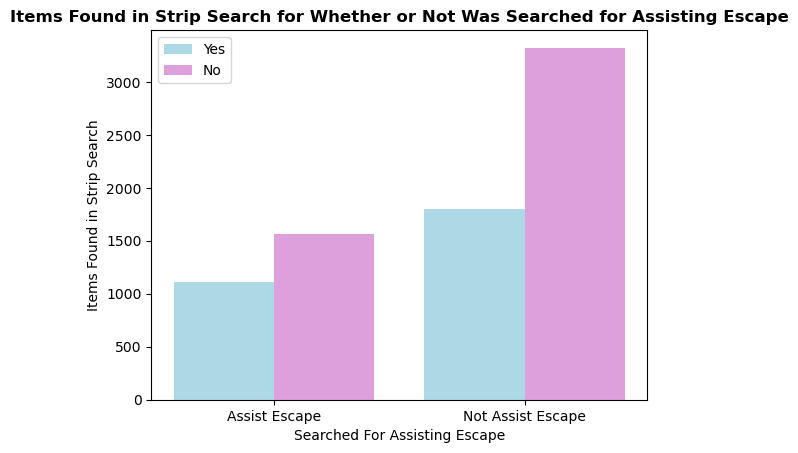

In [60]:
cols = ["Assist Escape", "Not Assist Escape"]
yes = [sum(df_strip["ItemsFound"][df_strip["SearchReason_AssistEscape"] == 1]),
      sum(df_strip["ItemsFound"][df_strip["SearchReason_AssistEscape"] == 0])]
r_1 = df_strip["ItemsFound"][df_strip["SearchReason_AssistEscape"] == 1].shape[0]
r_2 = df_strip["ItemsFound"][df_strip["SearchReason_AssistEscape"] == 0].shape[0]
no = [r_1 - yes[0], r_2 - yes[1]]
x = np.arange(len(cols))
plt.bar(x - 0.2, yes, 0.4, label = "Yes", color = "lightblue")
plt.bar(x + 0.2, no, 0.4, label = "No", color = "plum")
plt.xticks(x, cols)
plt.xlabel("Searched For Assisting Escape")
plt.ylabel("Items Found in Strip Search")
plt.title("Items Found in Strip Search for Whether or Not Was Searched for Assisting Escape",
         fontweight = "bold")
plt.legend()
plt.show()

In [61]:
tab = pd.crosstab(df_strip.ItemsFound, df_strip.SearchReason_AssistEscape)
tab[1][0] / (tab[1][0] + tab[0][0]), tab[1][1] / (tab[1][1] + tab[0][1])

(0.3206543967280164, 0.3809687392648574)

From the bar plot and the cross-table, we can see that the percentage of items found = 0 and items found = 1 differs between the ones that were searched for assisting escape and the ones that were not. This is consistent with the result of the t-test that there is an association between whether or not the person was searched for assisting escape and the items found in strip search. The statistics show that it is more likely to find items in a strip search when the person is being searched for assisting escape.

## Variable: SearchReason_PossessWeapons

### Cross-Table

In [62]:
tab = pd.crosstab(df_strip["ItemsFound"], 
                  df_strip["SearchReason_PossessWeapons"],
                  margins = True)
tab
(df_strip["ItemsFound"][df_strip["SearchReason_PossessWeapons"] == 1]).std()

0.48220422371602584

### F-Test

$H_0$: The variance of items found in strip search between people whose search reason was possessing weapons and people whose search reason was not possessing weapons are equal (i.e., $var_{weapons}=var_{no\space weapons}$) \
$H_A$: The variance of items found in strip search between people whose search reason was possessing weapons and people whose search reason was not possessing weapons are not equal (i.e., $var_{weapons}\ne var_{no\space weapons}$)

In [63]:
group1 = df_strip["ItemsFound"][df_strip["SearchReason_PossessWeapons"] == 1]
group2 = df_strip["ItemsFound"][df_strip["SearchReason_PossessWeapons"] == 0]
group1 = np.array(group1)
group2 = np.array(group2)
f = np.var(group1, ddof = 1) / np.var(group2, ddof = 1)
nun = group1.size - 1
dun = group2.size - 1
p = 1 - scipy.stats.f.cdf(f, nun, dun)
p

0.6350435189551623

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. There is no difference for variance of items found between people whose search reason was possessing weapons and people whose search reason was not possessing weapons, therefore we apply t-test with equal variance.

### T-Test with Equal Variance

$H_0$: The items found in strip search is not associated with whether or not the person was searched for possessing weapons (i.e., $\mu_{weapons}=\mu_{no\space weapons}$) \
$H_A$: The items found in strip search is associated with whether or not the person was searched for possessing weapons (i.e., $\mu_{weapons}\ne\mu_{no\space weapons}$)

In [64]:
st.ttest_ind(df_strip["ItemsFound"][df_strip["SearchReason_PossessWeapons"] == 1],
            df_strip["ItemsFound"][df_strip["SearchReason_PossessWeapons"] == 0],
            equal_var = True)

Ttest_indResult(statistic=-0.933712377411603, pvalue=0.35048118482005297)

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. Thus there is no association between the items found in strip search and whether or not the person was searched for possessing weapons.

### Plot

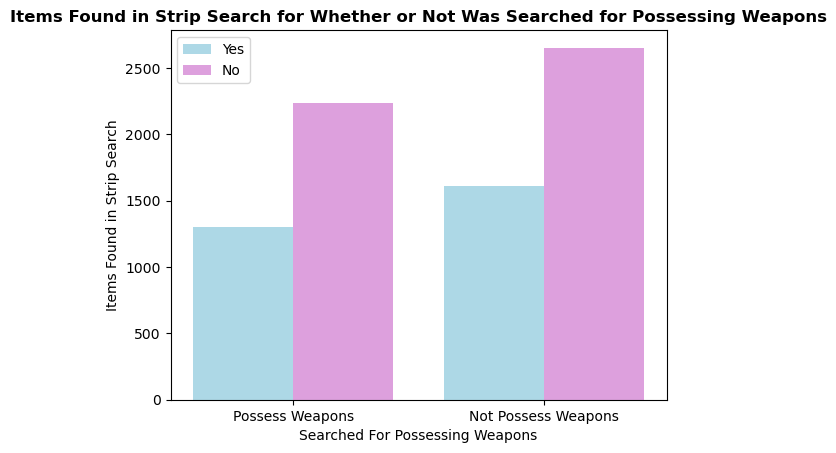

In [65]:
cols = ["Possess Weapons", "Not Possess Weapons"]
yes = [sum(df_strip["ItemsFound"][df_strip["SearchReason_PossessWeapons"] == 1]),
      sum(df_strip["ItemsFound"][df_strip["SearchReason_PossessWeapons"] == 0])]
r_1 = df_strip["ItemsFound"][df_strip["SearchReason_PossessWeapons"] == 1].shape[0]
r_2 = df_strip["ItemsFound"][df_strip["SearchReason_PossessWeapons"] == 0].shape[0]
no = [r_1 - yes[0], r_2 - yes[1]]
x = np.arange(len(cols))
plt.bar(x - 0.2, yes, 0.4, label = "Yes", color = "lightblue")
plt.bar(x + 0.2, no, 0.4, label = "No", color = "plum")
plt.xticks(x, cols)
plt.xlabel("Searched For Possessing Weapons")
plt.ylabel("Items Found in Strip Search")
plt.title("Items Found in Strip Search for Whether or Not Was Searched for Possessing Weapons",
         fontweight = "bold")
plt.legend()
plt.show()

In [66]:
tab = pd.crosstab(df_strip.ItemsFound, df_strip.SearchReason_PossessWeapons)
tab[1][0] / (tab[1][0] + tab[0][0]), tab[1][1] / (tab[1][1] + tab[0][1])

(0.4574642126789366, 0.44658193060803847)

From the bar plot and the cross-table, we can see that the percentage of items found = 0 and items found = 1 is very similar between the ones that were searched for possessing weapons and the ones that were not. This is consistent with the result of the t-test that there is no association between whether or not the person was searched for possessing weapons and the items found in strip search.

## Variable: SearchReason_PossessEvidence

### Cross-Table

In [67]:
tab = pd.crosstab(df_strip["ItemsFound"], 
                  df_strip["SearchReason_PossessEvidence"],
                  margins = True)
tab
(df_strip["ItemsFound"][df_strip["SearchReason_PossessEvidence"] == 1]).std()

0.4839988096310681

### F-Test

$H_0$: The variance of items found in strip search between people whose search reason was possessing crime evidence and people whose search reason was not possessing crime evidence are equal (i.e., $var_{evidence}=var_{no\space evidence}$) \
$H_A$: The variance of items found in strip search between people whose search reason was possessing crime evidence and people whose search reason was not possessing crime evidence are not equal (i.e., $var_{evidence}\ne var_{no\space evidence}$)

In [68]:
group1 = df_strip["ItemsFound"][df_strip["SearchReason_PossessEvidence"] == 1]
group2 = df_strip["ItemsFound"][df_strip["SearchReason_PossessEvidence"] == 0]
group1 = np.array(group1)
group2 = np.array(group2)
f = np.var(group1, ddof = 1) / np.var(group2, ddof = 1)
nun = group1.size - 1
dun = group2.size - 1
p = 1 - scipy.stats.f.cdf(f, nun, dun)
p

0.47357930574098495

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. There is no difference for variance of items found between people whose search reason was possessing crime evidence and people whose search reason was not possessing crime evidence, therefore we apply t-test with equal variance.

### T-Test with Equal Variance

$H_0$: The items found in strip search is not associated with whether or not the person was searched for possessing crime evidence (i.e., $\mu_{evidence}=\mu_{no\space evidence}$) \
$H_A$: The items found in strip search is associated with whether or not the person was searched for possessing crime evidence (i.e., $\mu_{evidence}\ne\mu_{no\space evidence}$)

In [69]:
st.ttest_ind(df_strip["ItemsFound"][df_strip["SearchReason_PossessEvidence"] == 1],
            df_strip["ItemsFound"][df_strip["SearchReason_PossessEvidence"] == 0],
            equal_var = True)

Ttest_indResult(statistic=0.16708925508765377, pvalue=0.8673041522659081)

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. Thus there is no association between the items found in strip search and whether or not the person was searched for possessing crime evidence.

### Plot

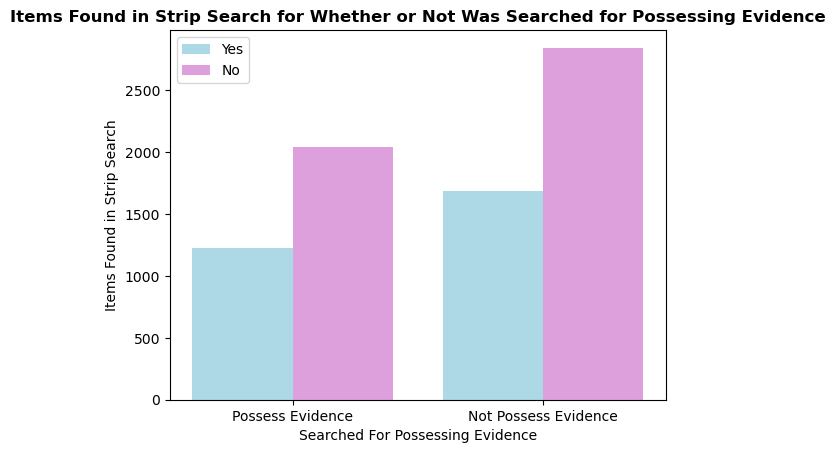

In [70]:
cols = ["Possess Evidence", "Not Possess Evidence"]
yes = [sum(df_strip["ItemsFound"][df_strip["SearchReason_PossessEvidence"] == 1]),
      sum(df_strip["ItemsFound"][df_strip["SearchReason_PossessEvidence"] == 0])]
r_1 = df_strip["ItemsFound"][df_strip["SearchReason_PossessEvidence"] == 1].shape[0]
r_2 = df_strip["ItemsFound"][df_strip["SearchReason_PossessEvidence"] == 0].shape[0]
no = [r_1 - yes[0], r_2 - yes[1]]
x = np.arange(len(cols))
plt.bar(x - 0.2, yes, 0.4, label = "Yes", color = "lightblue")
plt.bar(x + 0.2, no, 0.4, label = "No", color = "plum")
plt.xticks(x, cols)
plt.xlabel("Searched For Possessing Evidence")
plt.ylabel("Items Found in Strip Search")
plt.title("Items Found in Strip Search for Whether or Not Was Searched for Possessing Evidence",
         fontweight = "bold")
plt.legend()
plt.show()

In [71]:
tab = pd.crosstab(df_strip.ItemsFound, df_strip.SearchReason_PossessEvidence)
tab[1][0] / (tab[1][0] + tab[0][0]), tab[1][1] / (tab[1][1] + tab[0][1])

(0.418200408997955, 0.42013053933356237)

From the bar plot and the cross-table, we can see that the percentage of items found = 0 and items found = 1 is very similar between the ones that were searched for possessing crime evidence and the ones that were not. This is consistent with the result of the t-test that there is no association between whether or not the person was searched for possessing crime evidence and the items found in strip search.

# Three-way ANOVA

$H1_0$: The items found in strip search is not associated with whether or not the person showed mental instability at arrest \
$H1_A$: The items found in strip search is associated with whether or not the person showed mental instability at arrest
\
$H2_0$: The items found in strip search is not associated with whether or not the person was cooperative at arrest \
$H2_A$: The items found in strip search is associated with whether or not the person was cooperative at arrest
\
$H3_0$: The items found in strip search is not associated with whether or not the person was searched for assisting escape \
$H3_A$: The items found in strip search is associated with whether or not the person was searched for assisting escape
\
$H4_0$: Pooling whether the person showed mental instability at arrest, the effect of whether the person was cooperative at arrest is the same for items found in strip search for whether the person was searched for assisting escape \
$H4_A$: Pooling whether the person showed mental instability at arrest, the effect of whether the person was cooperative at arrest is not the same for items found in strip search for whether the person was searched for assisting escape
\
$H5_0$: Pooling whether the person was cooperative at arrest, the effect of whether the person was searched for assisting escape is the same for items found in strip search for whether the person showed mental instability at arrest \
$H5_A$: Pooling whether the person was cooperative at arrest, the effect of whether the person was searched for assisting escape is not the same for items found in strip search for whether the person showed mental instability at arrest
\
$H6_0$: Pooling whether the person was searched for assisting escape, the effect of whether the person was cooperative at arrest is the same for items found in strip search for whether the person showed mental instability at arrest \
$H6_A$: Pooling whether the person was searched for assisting escape, the effect of whether the person was cooperative at arrest is not the same for items found in strip search for whether the person showed mental instability at arrest
\
$H7_0$: There is no three way interaction among all the three explanatory variables \
$H7_A$: There is three way interaction among these three explanatory variables

In [72]:
# Associated Variables: Mental Instability, Cooperative, Assisted Escape
model = ols("ItemsFound ~ C(Actions_at_arrest___Mental_inst) + C(Actions_at_arrest___Cooperative) + C(SearchReason_AssistEscape) + C(Actions_at_arrest___Mental_inst):C(Actions_at_arrest___Cooperative) + C(Actions_at_arrest___Mental_inst):C(SearchReason_AssistEscape) + C(Actions_at_arrest___Cooperative):C(SearchReason_AssistEscape) + C(Actions_at_arrest___Mental_inst):C(Actions_at_arrest___Cooperative):C(SearchReason_AssistEscape)",
           data = df_strip).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Actions_at_arrest___Mental_inst),2.127411,1.0,9.157057,2.485694e-03
C(Actions_at_arrest___Cooperative),2.162189,1.0,9.306752,2.290785e-03
C(SearchReason_AssistEscape),7.356041,1.0,31.662751,1.897639e-08
C(Actions_at_arrest___Mental_inst):C(Actions_at_arrest___Cooperative),0.038956,1.0,0.167679,6.821943e-01
C(Actions_at_arrest___Mental_inst):C(SearchReason_AssistEscape),0.191935,1.0,0.826152,3.634158e-01
C(Actions_at_arrest___Cooperative):C(SearchReason_AssistEscape),2.161835,1.0,9.305231,2.292686e-03
C(Actions_at_arrest___Mental_inst):C(Actions_at_arrest___Cooperative):C(SearchReason_AssistEscape),0.868988,1.0,3.740403,5.314778e-02
Residual,1810.506784,7793.0,NaN,NaN


### Null Hypothesis 1:

Since the p-value is less than the significance level $\alpha=0.05$, there is evidence to reject the null hypothesis. Thus, there is evidence that the items found in strip search is associated with whether or not the person showed mental instability at arrest.

### Null Hypothesis 2:

Since the p-value is less than the significance level $\alpha=0.05$, there is evidence to reject the null hypothesis. Thus, there is evidence that the items found in strip search is associated with whether or not the person was cooperative at arrest.

### Null Hypothesis 3:

Since the p-value is less than the significance level $\alpha=0.05$, there is evidence to reject the null hypothesis. Thus, there is evidence that the items found in strip search is associated with whether or not the person was searched for assisting escape.

### Null Hypothesis 4:

Since the p-value is less than the significance level $\alpha=0.05$, there is evidence to reject the null hypothesis. Thus, there is evidence that pooling whether the person showed mental instability at arrest, the effect of whether the person was cooperative at arrest is not the same for items found in strip search for whether the person was searched for assisting escape.

### Null Hypothesis 5:

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. Thus, there is no evidence that pooling whether the person was cooperative at arrest, the effect of whether the person was searched for assisting escape is not the same for items found in strip search for whether the person showed mental instability at arrest.

### Null Hypothesis 6:

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. Thus there is no evidence that pooling whether the person was searched for assisting escape, the effect of whether the person was cooperative at arrest is not the same for items found in strip search for whether the person showed mental instability at arrest.

### Null Hypothesis 7:

Since the p-value is greater than the significance level $\alpha=0.05$, there is no evidence to reject the null hypothesis. Thus, there is no evidence that there is a three way interaction among these three explanatory variables.

## Post-hoc Tests

In [73]:
mc1 = MultiComparison(df_strip["ItemsFound"], df_strip["Actions_at_arrest___Mental_inst"])
result1 = mc1.tukeyhsd()
mc2 = MultiComparison(df_strip["ItemsFound"],df_strip["Actions_at_arrest___Cooperative"])
result2 = mc2.tukeyhsd()
mc3 = MultiComparison(df_strip["ItemsFound"],df_strip["SearchReason_AssistEscape"])
result3 = mc3.tukeyhsd()
print(result1.summary())
print(result2.summary())
print(result3.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.0542 0.0087 0.0137 0.0947   True
--------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.0286  0.01 0.0068 0.0503   True
-------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper  reject
------------------------------------------------
   0.0    1.0   0.0626   0.0  0.04 0.0852   True
------------------------------------------------


## Interaction Plot

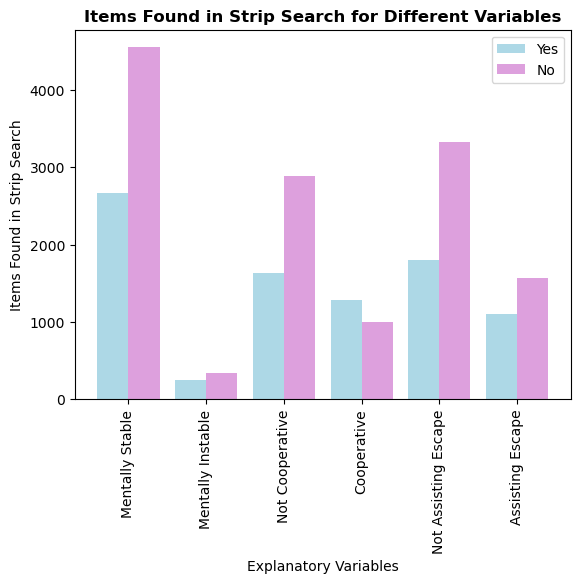

In [74]:
cols = ["Mentally Stable", "Mentally Instable",
       "Not Cooperative", "Cooperative",
       "Not Assisting Escape", "Assisting Escape"]
yes = [2660, 251, 1632, 1279, 1802, 1109]

no = [4548, 342, 2887, 1003, 3322, 1568]
x = np.arange(len(cols))
plt.bar(x - 0.2, yes, 0.4, label = "Yes", color = "lightblue")
plt.bar(x + 0.2, no, 0.4, label = "No", color = "plum")
plt.xticks(x, cols, rotation=90)
plt.xlabel("Explanatory Variables")
plt.ylabel("Items Found in Strip Search")
plt.title("Items Found in Strip Search for Different Variables", fontweight="bold")
plt.legend()
plt.show()